In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(1234)

# Problem 1

### Plot of Ground Truth

In [3]:
x = np.linspace(0,5,100)

In [4]:
y = x**3 - 5*x**2 + x + 2

Text(0.5, 1.0, '$f(x) = x^3 - 5x^2 + x + 2$')

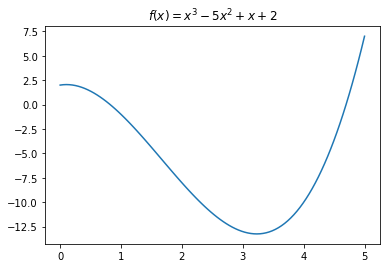

In [5]:
plt.plot(x,y)
plt.title('$f(x) = x^3 - 5x^2 + x + 2$')

### Training Sets

In [6]:
X_trains = []
y_trains = []
for i in range(10):
    x = pd.Series([np.random.uniform(0,5) for x in range(15)])
    y = x**3 - 5*x**2 + x + 2
    y = y.map(lambda x: x + np.random.normal(loc = 0, scale = 2))
    y_trains.append(list(y))
    X_trains.append(list(x))

**Scatterplot of Training Sets**

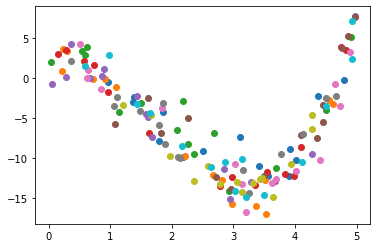

In [7]:
for xs,ys in zip(X_trains,y_trains):
    plt.scatter(xs,ys)

### Fitting Models

In [8]:
models = pd.DataFrame(columns = ['set','model','degree','train_MSE'])
plot_data = pd.DataFrame(columns=['degree','x','y'])

c = 0
for X,y in zip(X_trains,y_trains):
    c += 1
    for i in [1,2,3,4,5]:
        model = make_pipeline(PolynomialFeatures(degree = i), LinearRegression(copy_X=True))
        model.fit(np.array(X).reshape(-1,1), np.array(y).reshape(-1,1))
        mse = mean_squared_error(np.array(y),model.predict(np.array(X).reshape(-1,1)))
        models = models.append({'set':c, 'model':model, 'degree':i, 'train_MSE':mse}, ignore_index = True)
        if c == 1:
            poly = PolynomialFeatures(i)
            polyx = poly.fit_transform(np.array(X).reshape(-1,1))
            pred = model[1].predict(polyx)
            for xs,ys in zip(X, pred.reshape(1,-1)[0]):
                plot_data = plot_data.append({'degree':i,'x':xs,'y':ys}, ignore_index=True)
                
plot_data = plot_data.sort_values(by=['degree','x'])

**Models**

This data table contains all 50 models of varying degree that were fitted to the training data.

In [9]:
models.head()

,set,model,degree,train_MSE
0,1,"(PolynomialFeatures(degree=1), LinearRegressio...",1,15.489774
1,1,"(PolynomialFeatures(), LinearRegression())",2,4.260433
2,1,"(PolynomialFeatures(degree=3), LinearRegressio...",3,3.310644
3,1,"(PolynomialFeatures(degree=4), LinearRegressio...",4,3.252565
4,1,"(PolynomialFeatures(degree=5), LinearRegressio...",5,3.233444


**Plot of Training MSE**

As expexted the MSE of the training data goes down as the flexibility increases.

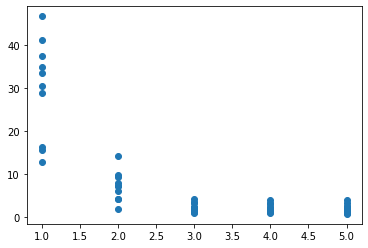

In [10]:
plt.scatter(models.loc[:,'degree'],models.loc[:,'train_MSE'])

### Test Sets

In [11]:
X_tests = []
y_tests = []
for i in range(10):
    x = pd.Series([np.random.uniform(0,5) for x in range(15)])
    y = x**3 - 5*x**2 + x + 2
    y = y.map(lambda x: x + np.random.normal(loc = 0, scale = 2))
    y_tests.append(list(y))
    X_tests.append(list(x))

In [12]:
tests = pd.DataFrame(columns=['model', 'degree','test_mse'])
for i in range(50):
    model = models.loc[i,'model'][1]
    degree = models.loc[i,'degree']
    
    for xs,ys in zip(X_tests,y_tests):
        poly = PolynomialFeatures(degree)
        xs = poly.fit_transform(np.array(xs).reshape(-1,1))
        pred = model.predict(xs)
        mse = mean_squared_error(np.array(ys),pred.reshape(1,-1)[0])
        tests = tests.append({'model':i, 'degree':int(degree),'test_mse':mse}, ignore_index=True)

**Tests**

This data table holds the MSE for the tests by degree.  This will be used to compute an average MSE for the test sets by degree.

In [13]:
tests.head()

,model,degree,test_mse
0,0.0,1.0,45.750632
1,0.0,1.0,30.635349
2,0.0,1.0,34.892665
3,0.0,1.0,54.268535
4,0.0,1.0,32.684440


**Combined Test and Training MSE**

The following data table was created to ease plot production.

In [14]:
test_mse = tests.groupby('degree').mean('test_mse').drop('model', axis = 1)

In [15]:
train_mse = models.groupby('degree').mean('test_mse')

In [16]:
mse = test_mse.join(train_mse, on = 'degree')

In [17]:
mse

,test_mse,train_MSE
degree,,
1.0,40.295172,29.729292
2.0,20.701729,7.216555
3.0,10.161037,2.368111
4.0,25.815241,2.242016
5.0,251.742825,2.018578


## Replicated Plot
The following is a replication of the plot on slide 18 using synthesized data and showing the fitted model of varying flexibility over the true function on one plot and the comparison of the training set MSE versus the average testing set MSE on the other plot.

Text(0.5, 0, 'Flexibility')

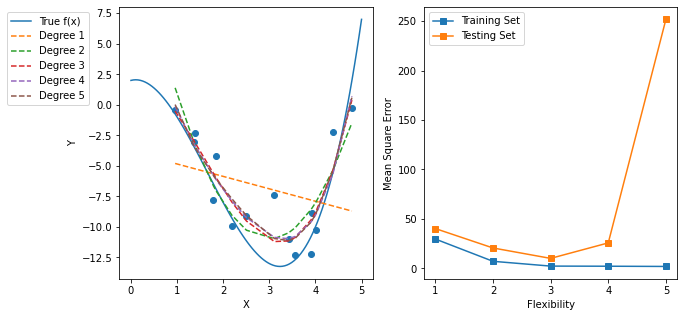

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(121)
x_true = np.linspace(0,5,100)
y_true = x_true**3 - 5*x_true**2 + x_true + 2
plt.plot(x_true,y_true, label='True f(x)')
plt.scatter(X_trains[0],y_trains[0], marker = 'o')
for i in [1,2,3,4,5]:
    data = plot_data.loc[plot_data.degree == i]
    plt.plot(data.loc[:,'x'],data.loc[:,'y'],linestyle='dashed', label='Degree '+str(i))
plt.legend(bbox_to_anchor = (-0.1,1))
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(122)
plt.plot(list(mse.index),list(mse.train_MSE),marker='s', label='Training Set')
plt.plot(list(mse.index),list(mse.test_mse),marker='s', label='Testing Set')
plt.legend()
plt.ylabel("Mean Square Error")
plt.xlabel("Flexibility")

By looking at the plot of MSE, we can see that both the training ans testing set MSE decrease until the 3rd degree polynomial fit after which the testing set MSE starts to increase while the training set continues to decrease.

# Problem 2

**Raw Data**

In [19]:
coins = pd.read_csv("coin_data.csv")
coins = coins.rename(columns = {'Name ':'Name', 
                            'Pennies ':'Pennies',
                            'Nickels ':'Nickels',
                            'Dimes ':'Dimes',
                            'Quarters ':'Quarters', 
                            'Dollar coins':'Dollar coins'})

In [20]:
coins

,Name,Pennies,Nickels,Dimes,Quarters,Dollar coins
0,Jacob,2,0,1,1,0
1,Dimitri,6,3,6,1,0
2,Danielle,2,3,1,8,0
3,Sara,8,2,6,10,0
4,Conor,6,3,1,2,0
5,Kevin,3,2,1,4,0
6,Rick,3,3,1,5,0
7,Adam,3,0,4,1,0
8,Tim,4,4,3,3,1
9,Amanda,2,0,2,6,0


**Formatting data for ML**

We want to use the total number of coins ('X1') and the number of pennies, nickels, and dimes ('X2') to predict the total monetary value of the change ('Y'), so the following code creates those variables using the raw data.

In [21]:
# Total amount in $
coins.loc[:,'Y'] =  coins.loc[:,'Pennies'] * 0.01 + coins.loc[:,'Nickels'] * 0.5 + coins.loc[:,'Dimes'] * 0.10 + coins.loc[:,'Quarters'] * 0.25 + coins.loc[:,'Dollar coins']

In [22]:
# Total number of coins
coins.loc[:,'X1'] =  coins.loc[:,'Pennies'] + coins.loc[:,'Nickels'] + coins.loc[:,'Dimes'] + coins.loc[:,'Quarters'] + coins.loc[:,'Dollar coins']

In [23]:
# Number of pennies, nickels, and dimes
coins.loc[:,'X2'] =  coins.loc[:,'Pennies'] + coins.loc[:,'Nickels'] + coins.loc[:,'Dimes']

In [24]:
coins.head()

,Name,Pennies,Nickels,Dimes,Quarters,Dollar coins,Y,X1,X2
0,Jacob,2,0,1,1,0,0.37,4,3
1,Dimitri,6,3,6,1,0,2.41,16,15
2,Danielle,2,3,1,8,0,3.62,14,6
3,Sara,8,2,6,10,0,4.18,26,16
4,Conor,6,3,1,2,0,2.16,12,10


### Linear Regression

In [25]:
lm = LinearRegression()

In [26]:
y_train = coins.loc[:,'Y']

In [27]:
X_train = coins.loc[:,['X1','X2']]

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

### Results
The predicted regression formula is: $Y = 0.723 + 0.231\cdot X1 -0.137 \cdot X2$.  It is important to note that the correlation between the total number of coins and the number of pennies, nickels, and dimes is very high, rightfully so. Therefore, it would be unwise to make any simplistic inferences about the effect of these variable on the total monetary value. 

In [29]:
lm.coef_

array([ 0.23069829, -0.13683058])

In [30]:
lm.intercept_

0.7228568693122548

In [31]:
coins.loc[:,['Y','X1','X2']].corr()

,Y,X1,X2
Y,1.000000,0.953334,0.856120
X1,0.953334,1.000000,0.955094
X2,0.856120,0.955094,1.000000


**Including Interaction Terms**
I decided to include interaction terms to see if they improved the model. The new function is:$Y=-0.13 + 0.32 \cdot X1 -0.16 \cdot X2-0.001\cdot X1\cdot X2$

In [32]:
X_train['X1X2'] = X_train['X1'] * X_train['X2']

In [33]:
lm2 = LinearRegression()

In [34]:
lm2.fit(X_train,y_train)

LinearRegression()

In [35]:
lm2.coef_

array([ 0.3191344 , -0.16386436, -0.00119669])

In [36]:
lm2.intercept_

-0.1297558616937069

## Predicting Novel Data
I decided to create some artificial test data.  I created the random values using the statistics of the raw data.

In [37]:
coins.describe()

,Pennies,Nickels,Dimes,Quarters,Dollar coins,Y,X1,X2
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,8.944444,3.111111,5.333333,6.944444,0.055556,3.970000,24.388889,17.388889
std,8.741195,2.166290,5.551894,8.632853,0.235702,3.158548,21.155277,14.304006
min,2.000000,0.000000,1.000000,1.000000,0.000000,0.370000,4.000000,3.000000
25%,3.000000,2.000000,1.250000,2.250000,0.000000,2.137500,12.000000,7.000000
50%,6.000000,3.000000,3.500000,5.000000,0.000000,3.855000,17.000000,14.500000
75%,10.750000,4.750000,6.000000,7.750000,0.000000,4.957500,29.750000,22.250000
max,36.000000,7.000000,20.000000,39.000000,1.000000,14.610000,96.000000,57.000000


In [38]:
test_data = pd.DataFrame(columns=['Pennies','Nickels','Dimes','Quarters','Dollar coins'])
for i in range(20):
    p = abs(np.random.normal(loc = 8.94, scale = 8.74))
    n = abs(np.random.normal(loc = 3.11, scale = 2.17))
    d = abs(np.random.normal(loc = 5.33, scale = 5.55))
    q = abs(np.random.normal(loc = 6.94, scale = 8.63))
    dc = abs(np.random.normal(loc = 0.06, scale = 0.24))
    test_data = test_data.append({'Pennies':int(p),'Nickels':int(n),'Dimes':int(d),'Quarters':int(q),'Dollar coins':int(dc)}, ignore_index=True)

In [39]:
# Total amount in $
test_data.loc[:,'Y'] =  test_data.loc[:,'Pennies'] * 0.01 + test_data.loc[:,'Nickels'] * 0.5 + test_data.loc[:,'Dimes'] * 0.10 + test_data.loc[:,'Quarters'] * 0.25 + test_data.loc[:,'Dollar coins']

In [40]:
# Total number of coins
test_data.loc[:,'X1'] =  test_data.loc[:,'Pennies'] + test_data.loc[:,'Nickels'] + test_data.loc[:,'Dimes'] + test_data.loc[:,'Quarters'] + test_data.loc[:,'Dollar coins']

In [41]:
# Number of pennies, nickels, and dimes
test_data.loc[:,'X2'] =  test_data.loc[:,'Pennies'] + test_data.loc[:,'Nickels'] + test_data.loc[:,'Dimes']

In [42]:
test_data.head()

,Pennies,Nickels,Dimes,Quarters,Dollar coins,Y,X1,X2
0,18,2,9,7,0,3.83,36,29
1,0,1,4,7,0,2.65,12,5
2,22,1,3,2,0,1.52,28,26
3,0,2,1,2,0,1.6,5,3
4,3,1,0,17,0,4.78,21,4


### Results

The first model was able to predict the monetary value with an MSE of $\$1.34$

In [43]:
y_test = test_data.loc[:,'Y']

In [44]:
X_test = test_data.loc[:,['X1','X2']]

In [45]:
pred = lm.predict(X_test)

In [46]:
mean_squared_error(y_test, pred)

1.3384271609330682

The model that included the interaction terms had worse performance with an MSE of $\$1.91$

In [47]:
X_test['X1X2'] = X_test['X1'] * X_test['X2']

In [48]:
pred2 = lm2.predict(X_test)

In [49]:
mean_squared_error(y_test,pred2)

1.914168054320371

**Problem 3**

I decided to complete problem 3 in R since the question specifically references R methods